## Universal LLOP VWAP pricing

In [27]:
library(repr)

In [35]:
options(repr.plot.height = 5)

In [5]:
rhs <- funcation(rho,a){
    
    factor <- rho/sqrt(2*pi)
    integrand <- function(u){1/sqrt(1-u)*exp(-a^2/2*(1-sqrt(u))/(1+sqrt(u)))}
    res <- factor*integrate(integrand,lower=0,upper=1)$value
    return(res)
}

In [6]:
rhs(.1,2)

[1] 0.06317169

In [30]:
obj <- function(rho)function(a){(rhs(rho,a)-a)^2*1e6}

In [31]:
obj(.1)(2)

[1] 3751304

In [63]:
optim(.1,obj(.1),method="L-BFGS-B",lower=0,upper = 1000)

$par
[1] 0.07975254

$value
[1] 3.169113e-11

$counts
function gradient 
       5        5 

$convergence
[1] 0

$message
[1] "CONVERGENCE: REL_REDUCTION_OF_F <= FACTR*EPSMCH"

In [70]:
bigA.raw <- function(rho){
    
    res <- optim(min(aSmall(rho),aLarge(rho)),obj(rho),method="L-BFGS-B",lower=0,upper = 1000)$par
    return(res)
}

In [113]:
bigA <- function(rho){sapply(rho,bigA.raw)}

In [115]:
bigA(c(.1,2000))

[1]  0.07975254 63.22181570

In [40]:
aSmall <- function(rho){sqrt(2/pi)*rho}
aLarge <- function(rho){sqrt(2*rho)}

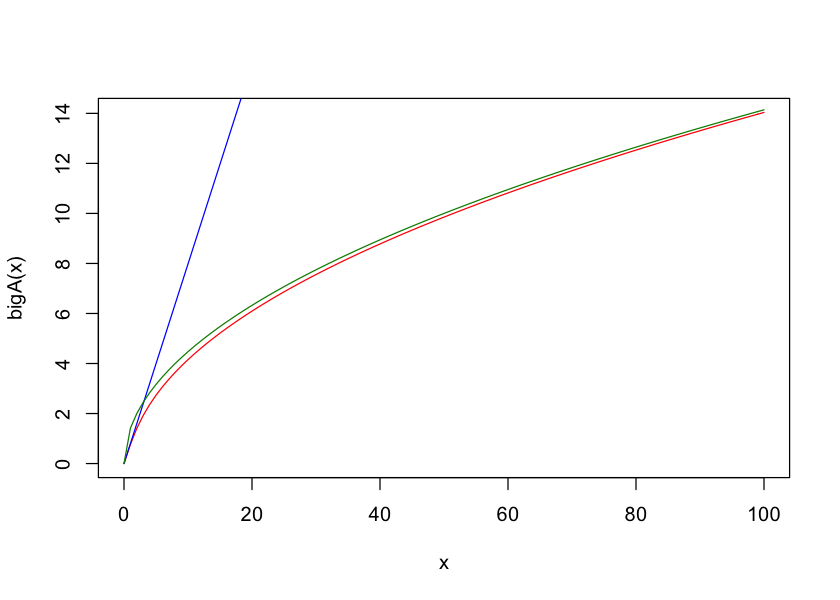

In [169]:
curve(bigA(x),from=0,to=100,col="red")
curve(aSmall(x),from=0,to=100,col="blue",add=T)
curve(aLarge(x),from=0,to=100,col="green4",add=T)

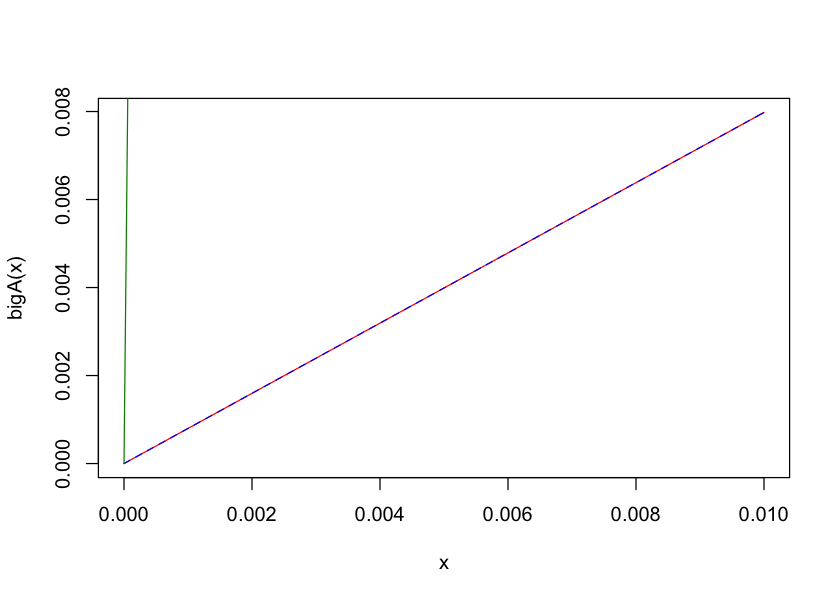

In [57]:
curve(bigA(x),from=0,to=.01,col="red")
curve(aSmall(x),from=0,to=.01,col="blue",lty=2,add=T)
curve(aLarge(x),from=0,to=.01,col="green4",add=T)

In [82]:
log(.01)

[1] -4.60517

In [79]:
log(10)

[1] 2.302585

In [119]:
log.rho <- seq(-5,7,.05)
elr <- exp(log.rho)

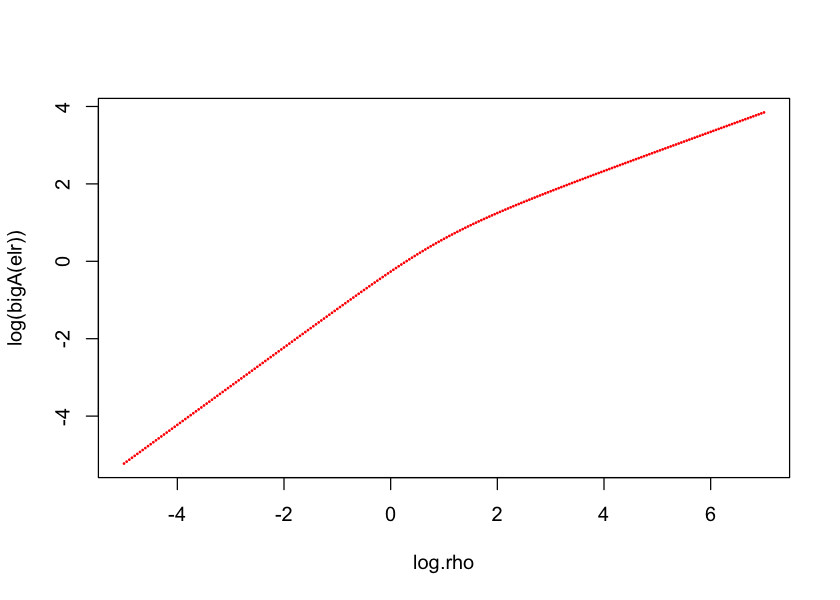

In [125]:
plot(log.rho,log(bigA(elr)),col="red",pch=20, cex=.25)

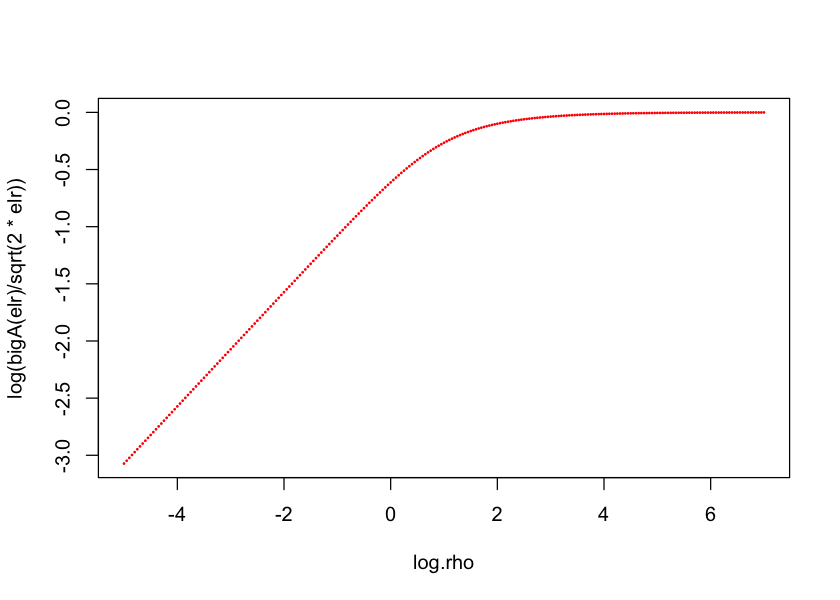

In [126]:
plot(log.rho,log(bigA(elr)/sqrt(2*elr)),col="red",pch=20, cex=.25)

### Fit a formula

$$
\frac{1}{4} \left(-\sqrt{(x-m)^2+\sigma ^2}-m+x\right)
$$

where $x = \log \rho$.

In [127]:
y.rho <- log(bigA(elr)/sqrt(2*elr)) 

In [141]:
y.fit <- function(paramvec){
    m <- paramvec[1]
    sig <- paramvec[2]
    x <- log.rho
    res <-(x-m - sqrt((x-m)^2+sig^2))/4
    return(res)}

In [155]:
y.fit2 <- function(sig){
    m <- log(pi)
    x <- log.rho
    res <-(x-m - sqrt((x-m)^2+sig^2))/4
    return(res)}

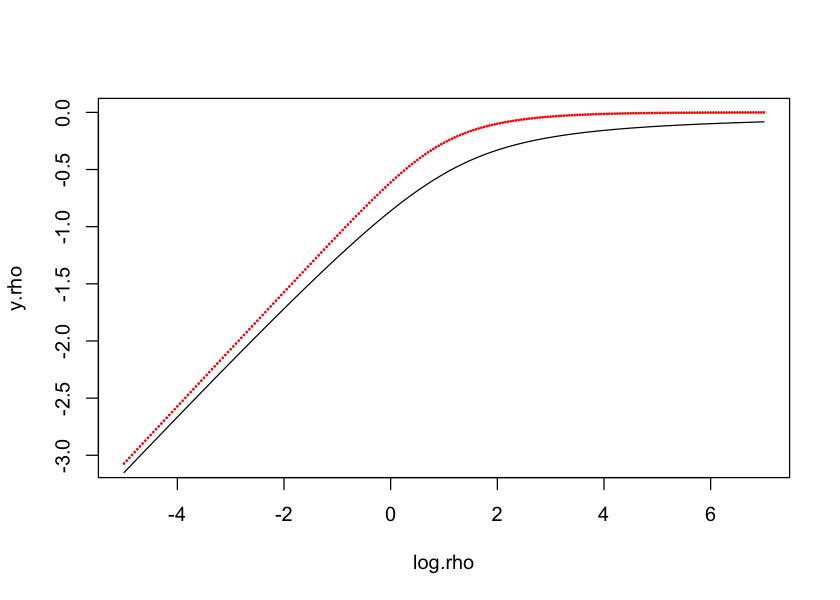

In [157]:
plot(log.rho,y.rho,col="red",pch=20, cex=.25)
lines(log.rho,y.fit2(2))

In [158]:
obj2 <- function(sig){sum((y.rho-y.fit2(sig))^2)*1e6}

In [159]:
obj2(2)

[1] 7047096

In [160]:
(res.optim <- optim(2,obj2,method="L-BFGS-B",lower=0,upper = 1000))

$par
[1] 0.7851864

$value
[1] 90284.18

$counts
function gradient 
      11       11 

$convergence
[1] 0

$message
[1] "CONVERGENCE: REL_REDUCTION_OF_F <= FACTR*EPSMCH"

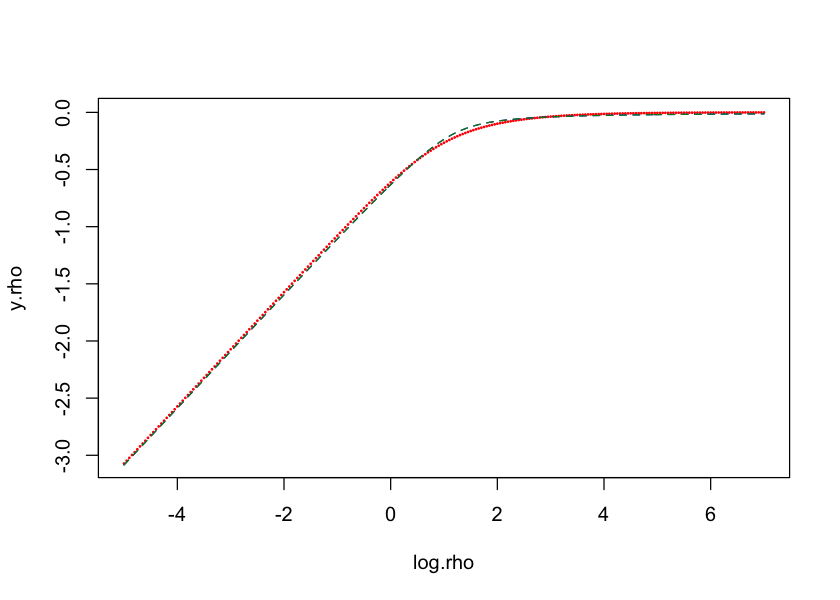

In [168]:
plot(log.rho,y.rho,col="red",pch=20, cex=.25)
lines(log.rho,y.fit2(res.optim$par),lty=2,col="blue")
lines(log.rho,y.fit2(pi/4),lty=2,col="green4")

Thus, our fitting function looks like:

$$
A(\rho) = \sqrt{2\,\rho}\,\exp \left\{\frac{1}{4} \left(-\sqrt{(\log \rho-m)^2+\sigma ^2}-m+\log \rho\right)
\right\}
$$

where $m = \log \pi$ and $\sigma=\pi/4$.  Thus, we may rewrite the fitting function as

$$
A(\rho) = \sqrt{2\,\rho}\,\exp \left\{\frac{1}{4} \left(-\sqrt{\left(\log \frac \rho \pi\right)^2+\frac {\pi^2}{16}}+\log \frac \rho \pi \right)
\right\}
$$

In [154]:
exp(1.09385183719795)

[1] 2.985753

In [167]:
pi/4

[1] 0.7853982